In [3]:
source("../Model/modelling_functions.R")
require("tidyverse")
require("ggplot2")

###############################################################
#open data
data_wider<-read.csv("../../Data/deyle_edited_wide.csv")
################################################################

################################################################
#data tidying and reformatting 
  #remove missing flu and temp values
data_wider<-data_wider[which(data_wider$T!="NAN"),]
data_wider<-data_wider[which(data_wider$flu!="NAN"),]
  #convert to celcius
data_wider$T<-(data_wider$T-32)*(5/9)
  #find weekly mean flu and temp over the years
data_wider_means<-data_wider %>% group_by(country,week) %>% summarise(meanflu=mean(flu),meantemp=mean(T))
  #convert week to day
data_wider_means$day<-(data_wider_means$week-1)*7+3.5

# find summary for each country- week and values for maxima and mimima
data_wider_means_summ<-data_wider_means %>% group_by(country) %>% summarise(minflu=min(meanflu),maxflu=max(meanflu),peakflu=week[which.max(meanflu)],troughflu=week[which.min(meanflu)],minT=min(meantemp),maxT=max(meantemp),peakT=week[which.max(meantemp)], troughT=week[which.min(meantemp)])
# convert to data frame
data_wider_means_summ<-as.data.frame(data_wider_means_summ)
#summary for each year for each country
data_wider_summ<-data_wider %>% group_by(country, year) %>% summarise(minflu=min(flu),maxflu=max(flu),peakflu=week[which.max(flu)],troughflu=week[which.min(flu)],minT=min(T),maxT=max(T),peakT=week[which.max(T)], troughT=week[which.min(T)])

#################################################################


Loading required package: deSolve

Loading required package: ggplot2

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

`summarise()` regrouping output by 'country' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'country' (override with `.groups` argument)



In [4]:
model_means<-read.csv("../../Results/model_means.csv")
model_means_summ<-read.csv("../../Results/model_means_summ.csv")
model_summ_year<-read.csv("../../Results/model_summ_year.csv")



# Plot mean model result for each time point 

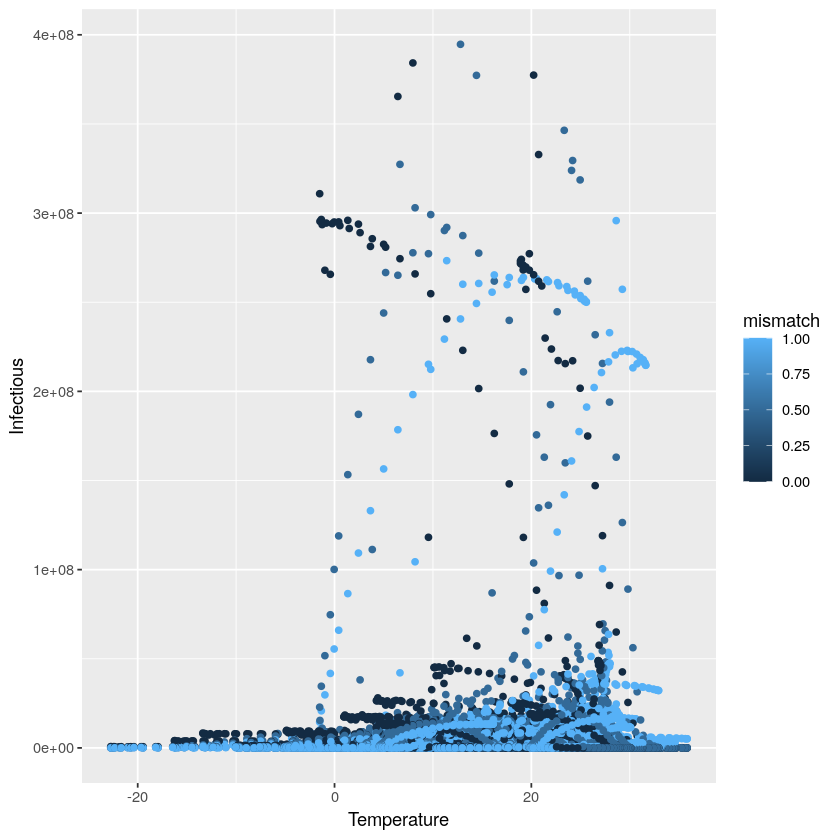

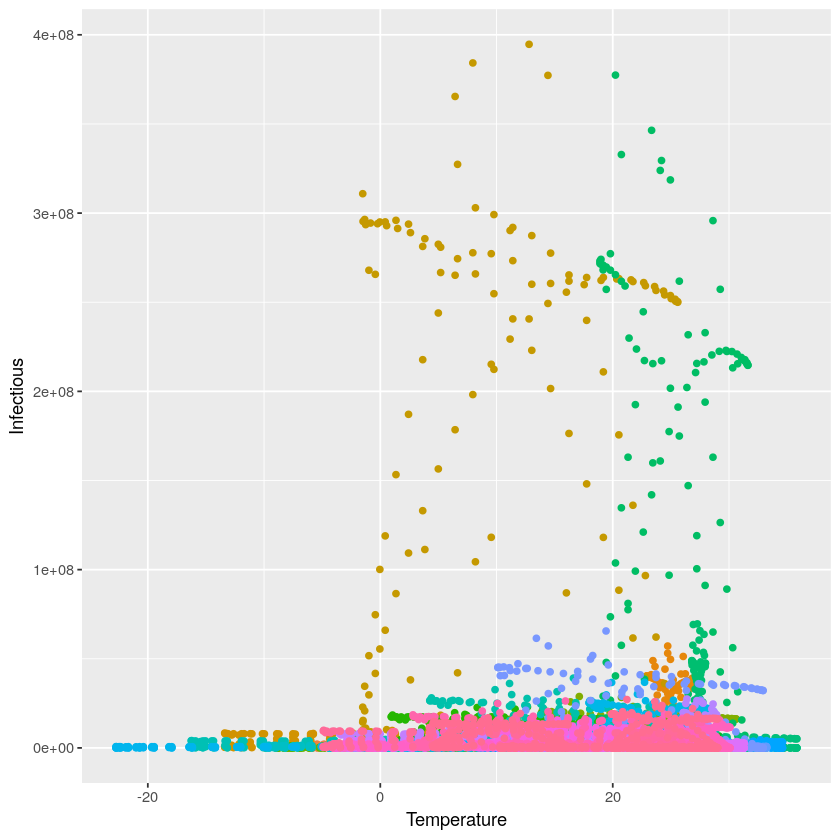

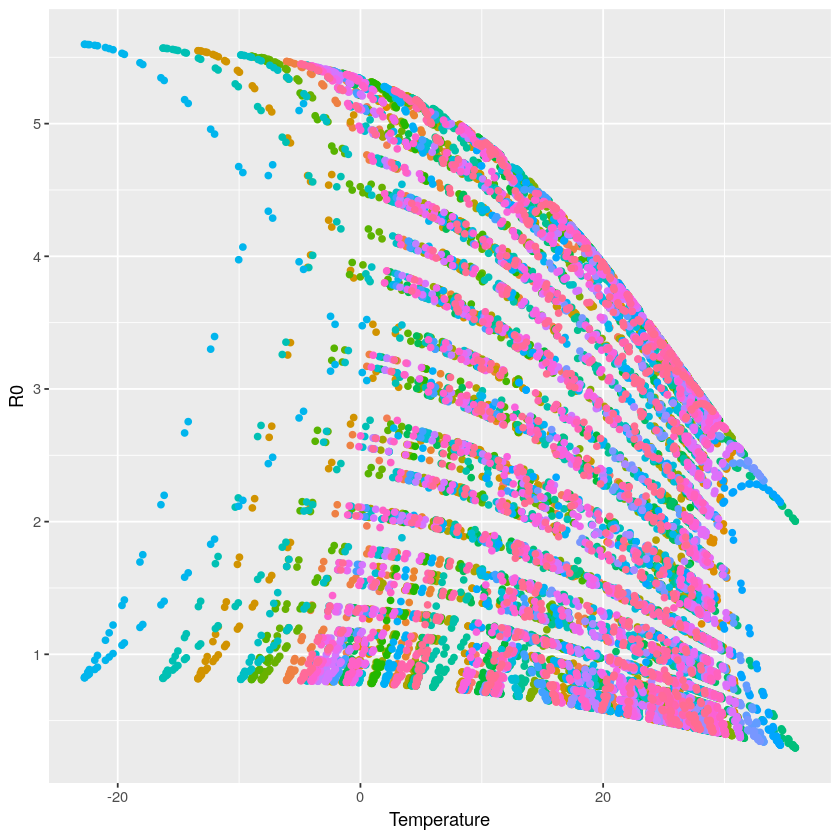

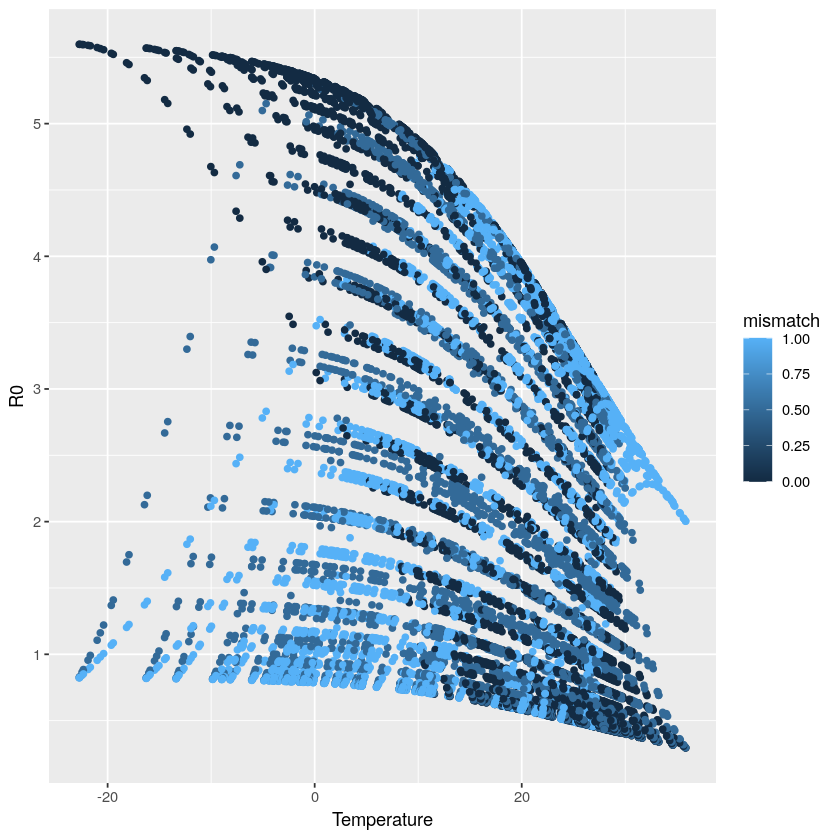

In [5]:

  #all model means- average of models for each timepoint 
ggplot(data=model_means, aes(meantemp,meanI,col=mismatch))+geom_point()+xlab("Temperature") +ylab("Infectious") #too complex to be useful
ggplot(data=model_means,aes(meantemp,meanI,color=country))+geom_point()+xlab("Temperature") +ylab("Infectious")+theme(legend.position ="none")
ggplot(data=model_means,aes(meantemp,meanR0,color=country))+geom_point()+xlab("Temperature") +ylab("R0")+theme(legend.position ="none")
ggplot(data=model_means,aes(meantemp,meanR0,color=mismatch,group=mismatch))+xlab("Temperature") +ylab("R0")+geom_point() 


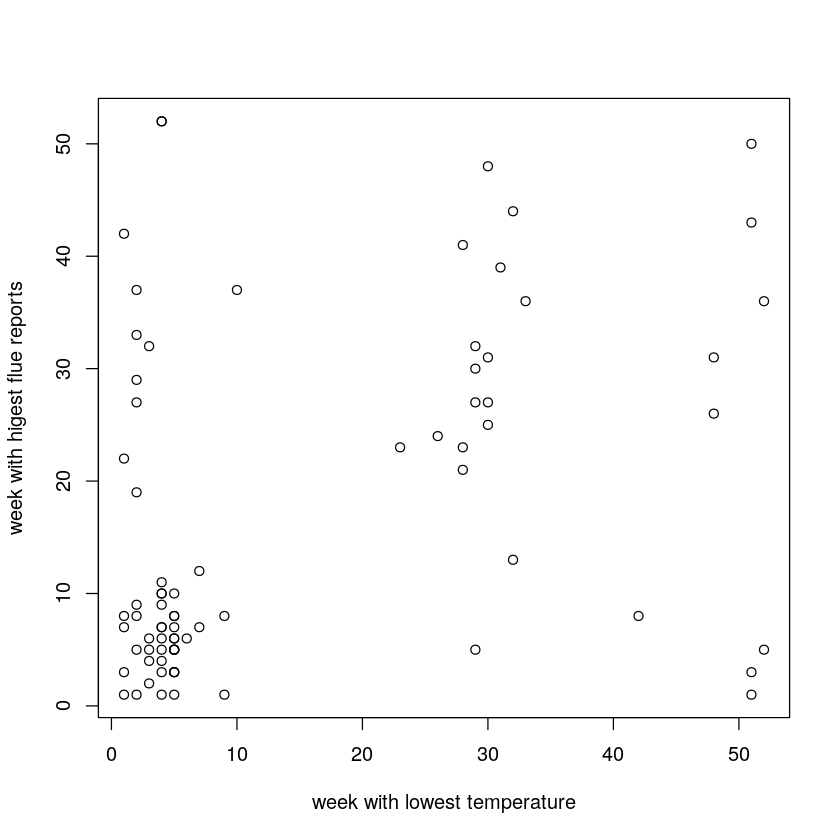

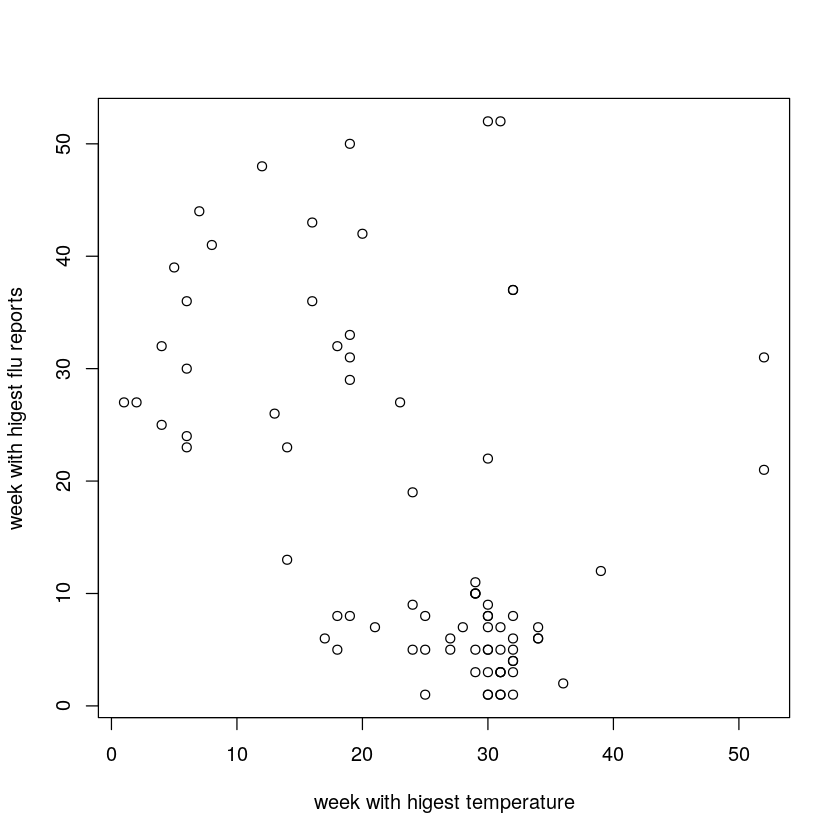

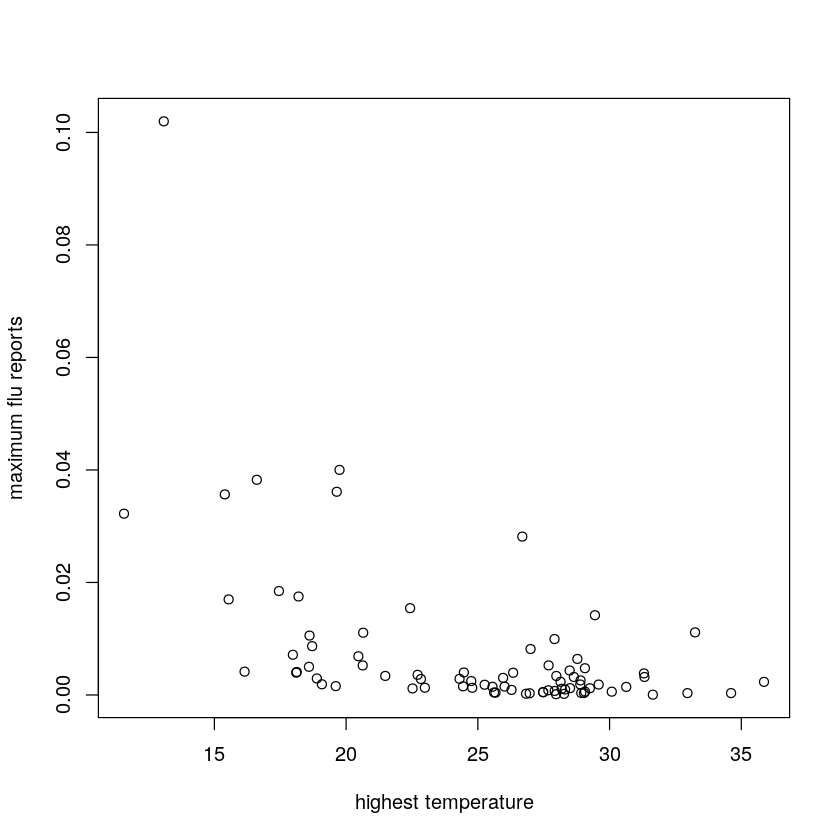

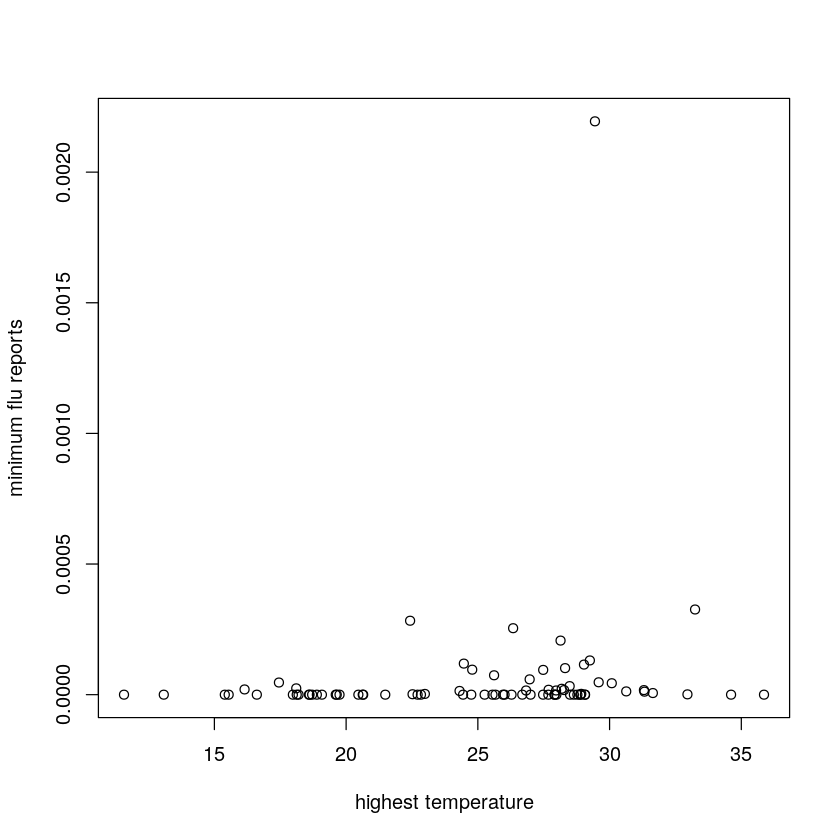

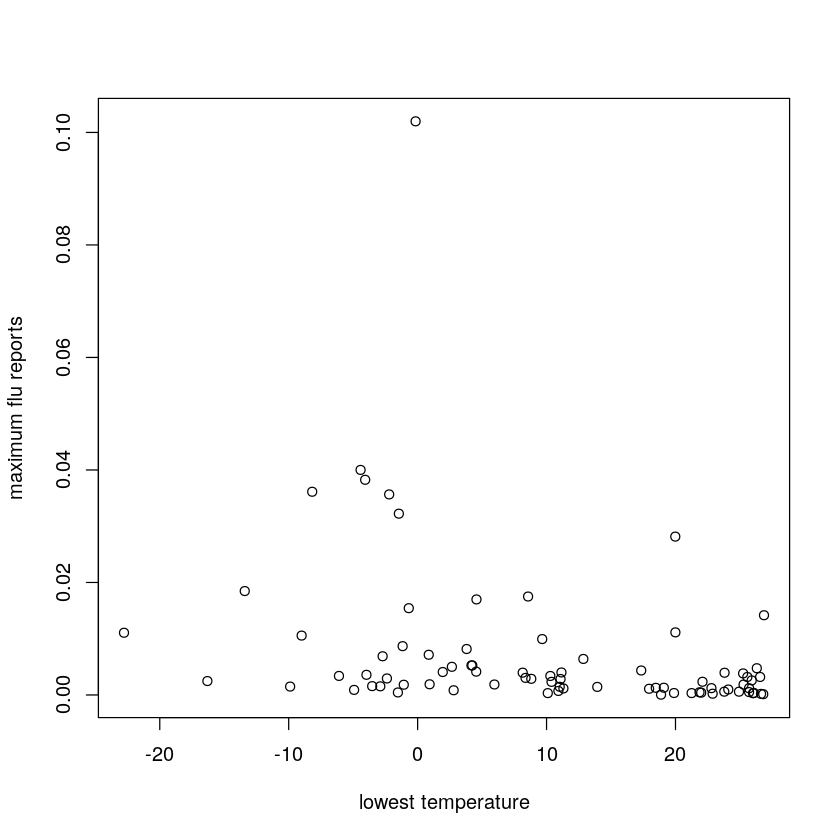

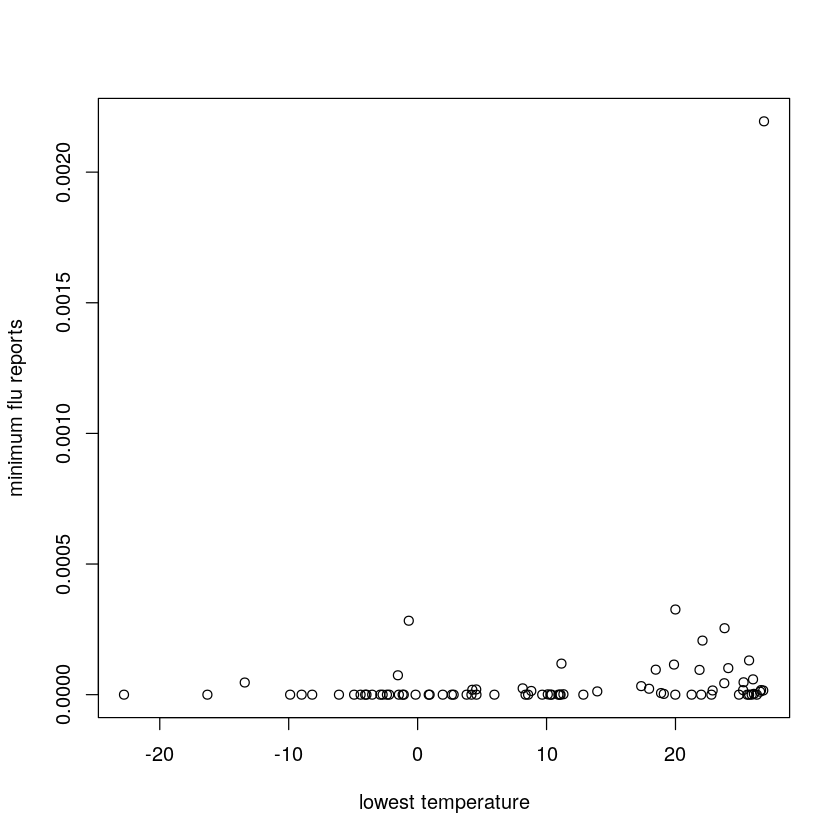

In [6]:
  #summary -DATA
plot(data_wider_means_summ$troughT,data_wider_means_summ$peakflu,xlab="week with lowest temperature",ylab="week with higest flue reports")# peak flu time and low temp time related
plot(data_wider_means_summ$peakT,data_wider_means_summ$peakflu,xlab="week with higest temperature",ylab="week with higest flu reports")  # negative correlation between high temp time and high flu time- looks almost lke 30 week lag
plot(data_wider_means_summ$maxT,data_wider_means_summ$maxflu,xlab="highest temperature",ylab="maximum flu reports") #when max  temperature is higher,less flu
plot(data_wider_means_summ$maxT,data_wider_means_summ$minflu,xlab="highest temperature",ylab="minimum flu reports") #?
plot(data_wider_means_summ$minT,data_wider_means_summ$maxflu,xlab="lowest temperature",ylab="maximum flu reports") #when min temperature is higher,less flu
plot(data_wider_means_summ$minT,data_wider_means_summ$minflu,xlab="lowest temperature",ylab="minimum flu reports")#?


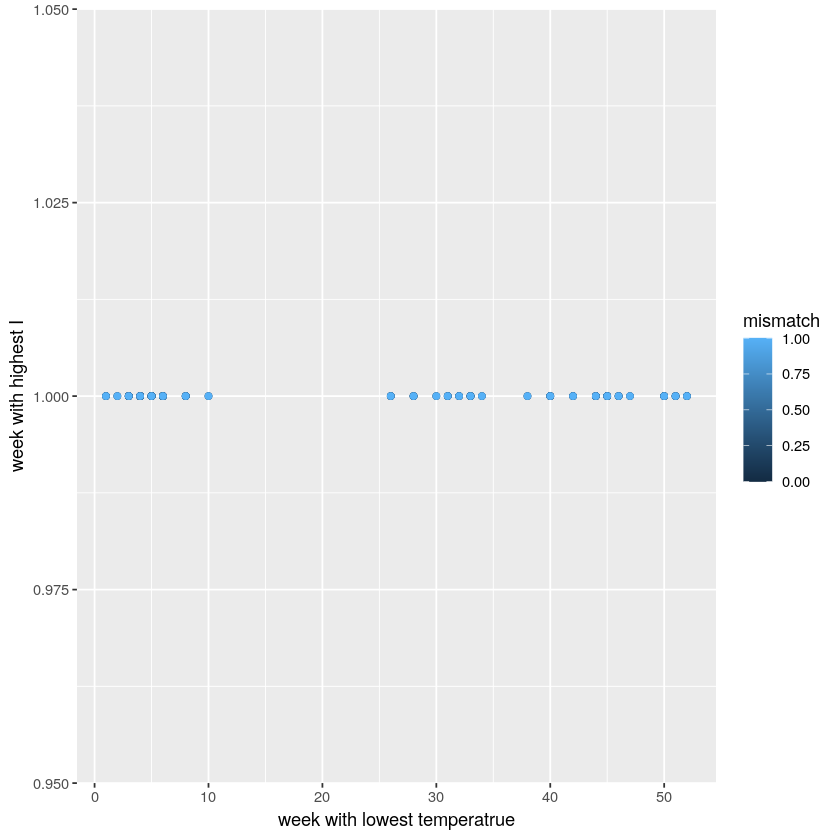

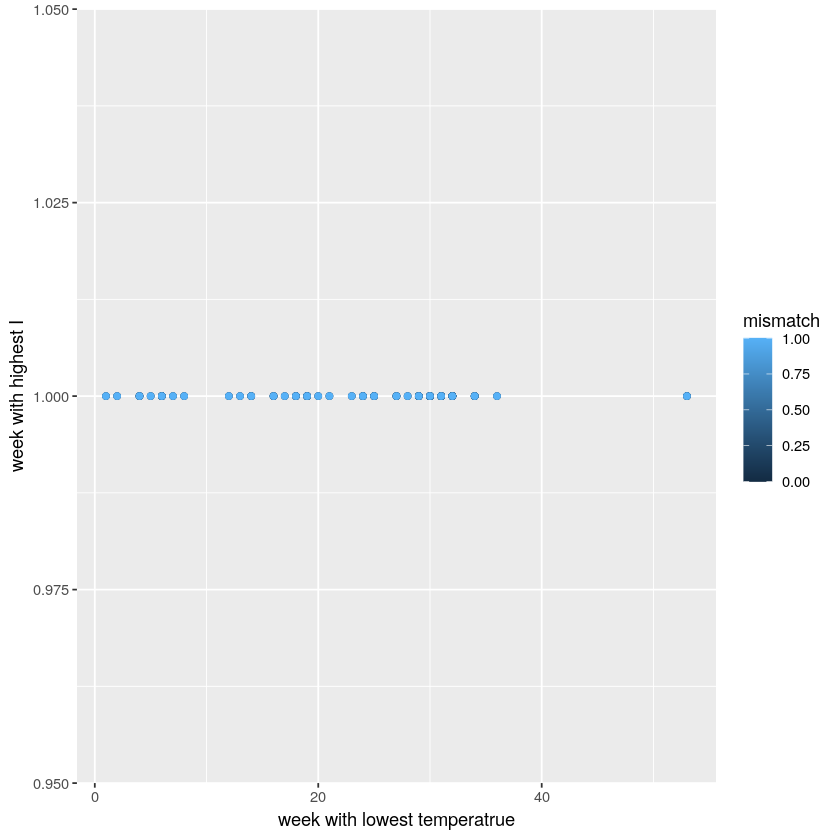

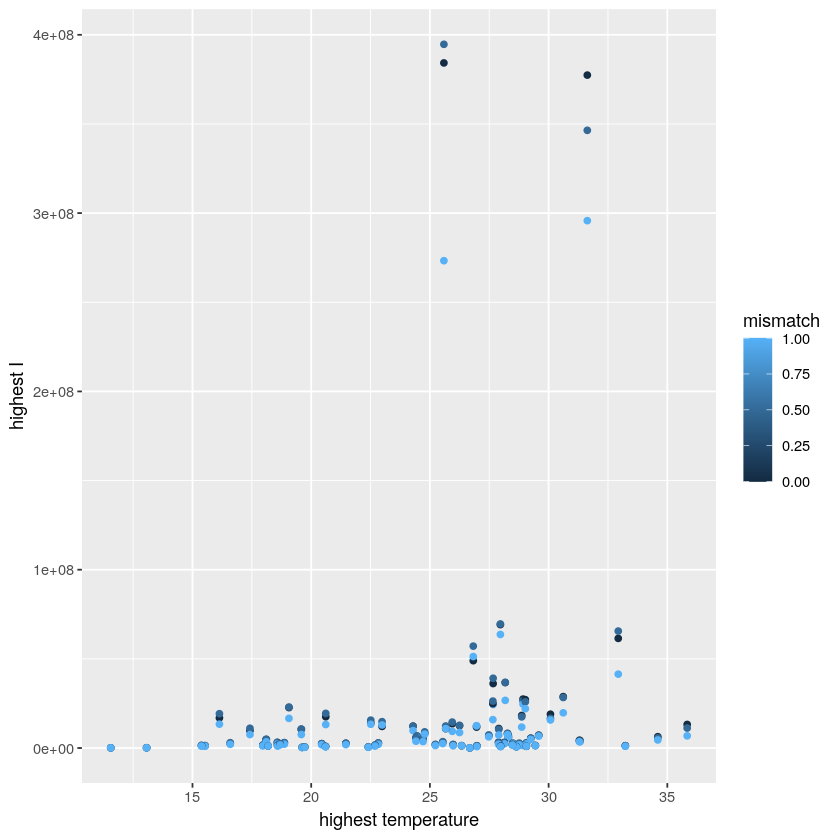

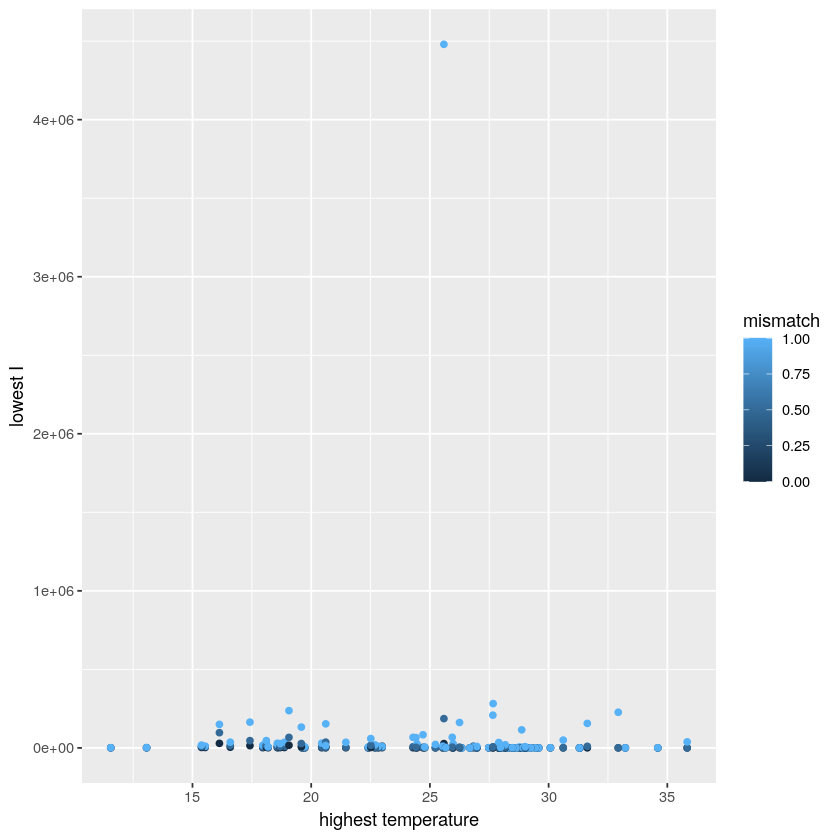

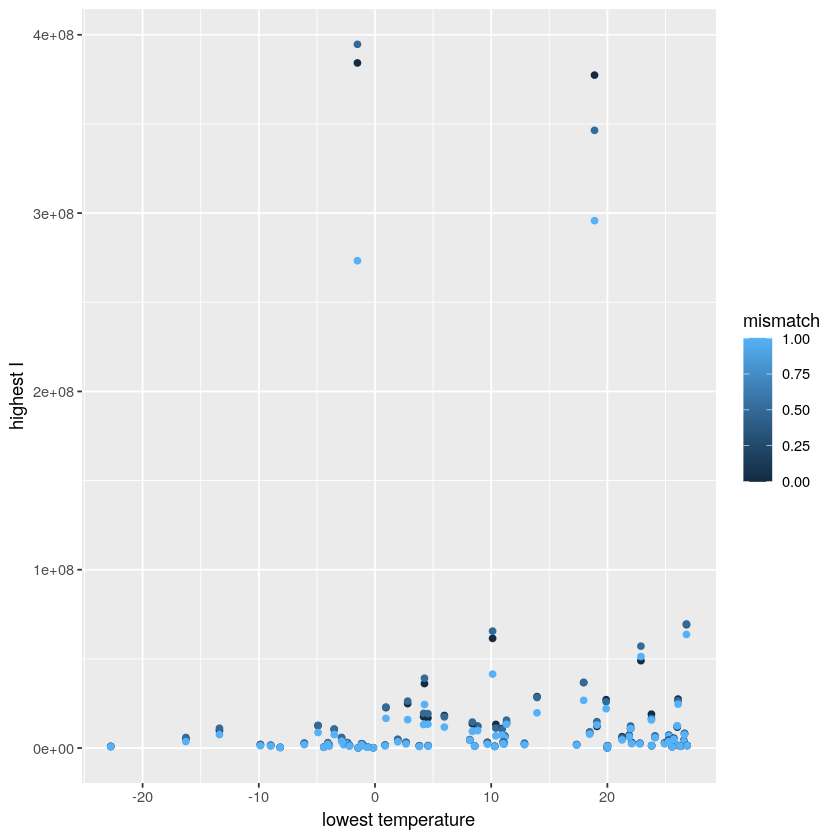

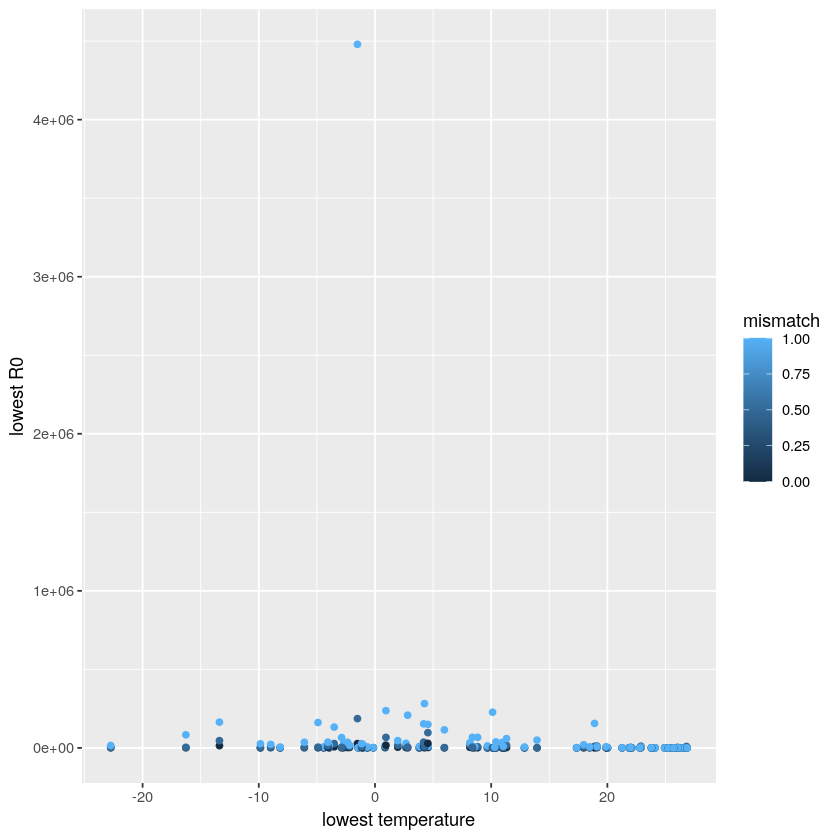

In [7]:

  #summary -models -I
ggplot(data=model_means_summ, aes(troughT,peakI,col=mismatch))+xlab("week with lowest temperatrue") +ylab("week with highest I")+geom_point()# peak flu time and low temp time related.  mismatch determines lag. mismatch od 0 looks most like data
ggplot(data=model_means_summ, aes(peakT,peakI,col=mismatch))+xlab("week with lowest temperatrue") +ylab("week with highest I")+geom_point() #oposite to expected. seems to suggest that mismatch determines extent of lag but peak temp does map lag
ggplot(data=model_means_summ, aes(maxT,maxI,col=mismatch))+xlab("highest temperature")+ylab("highest I")+geom_point()# for some mismatches, increase temp increases I, for some it decreases 
ggplot(data=model_means_summ, aes(maxT,minI,col=mismatch))+xlab("highest temperature")+ylab("lowest I")+geom_point() #max/min used not all that insightful.  country means more insigntful
ggplot(data=model_means_summ, aes(minT,maxI,col=mismatch))+xlab("lowest temperature")+ylab("highest I")+geom_point()
ggplot(data=model_means_summ, aes(minT,minI,col=mismatch))+xlab("lowest temperature")+ylab("lowest R0")+geom_point()


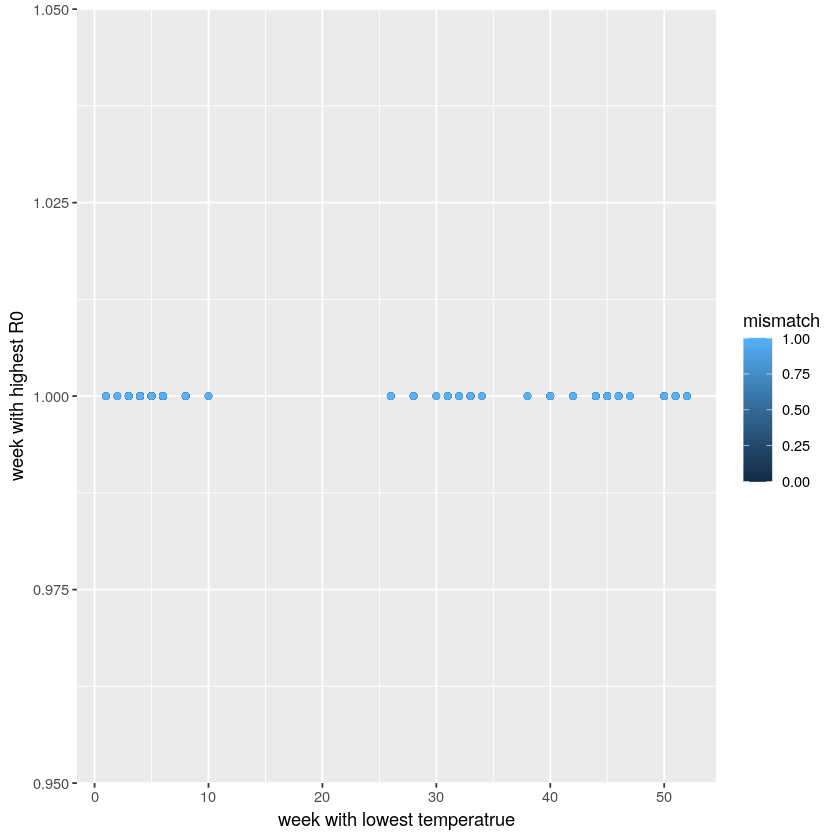

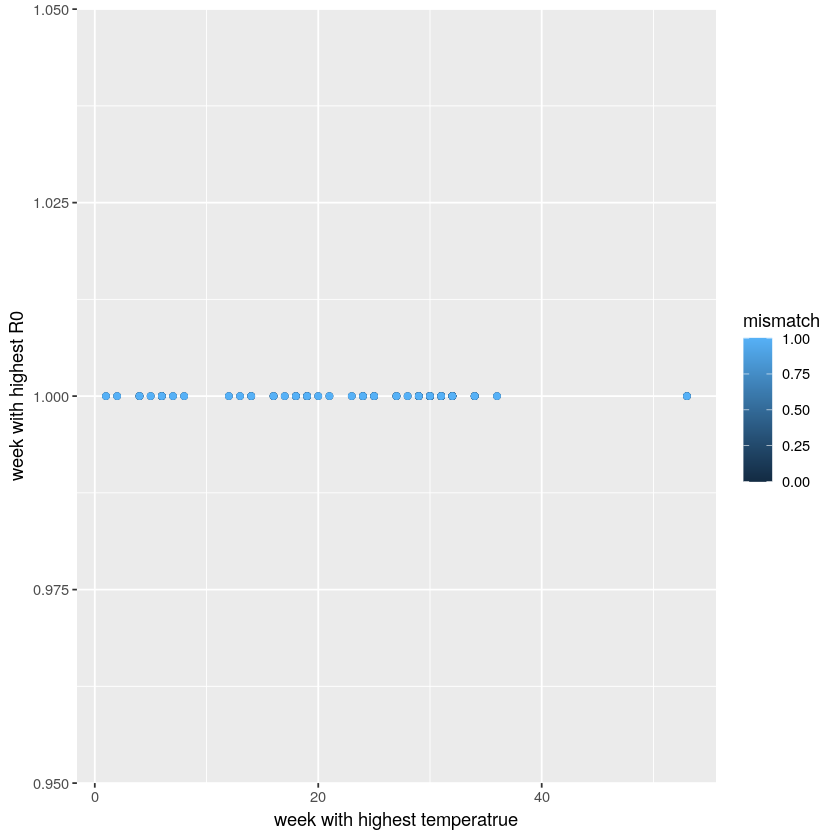

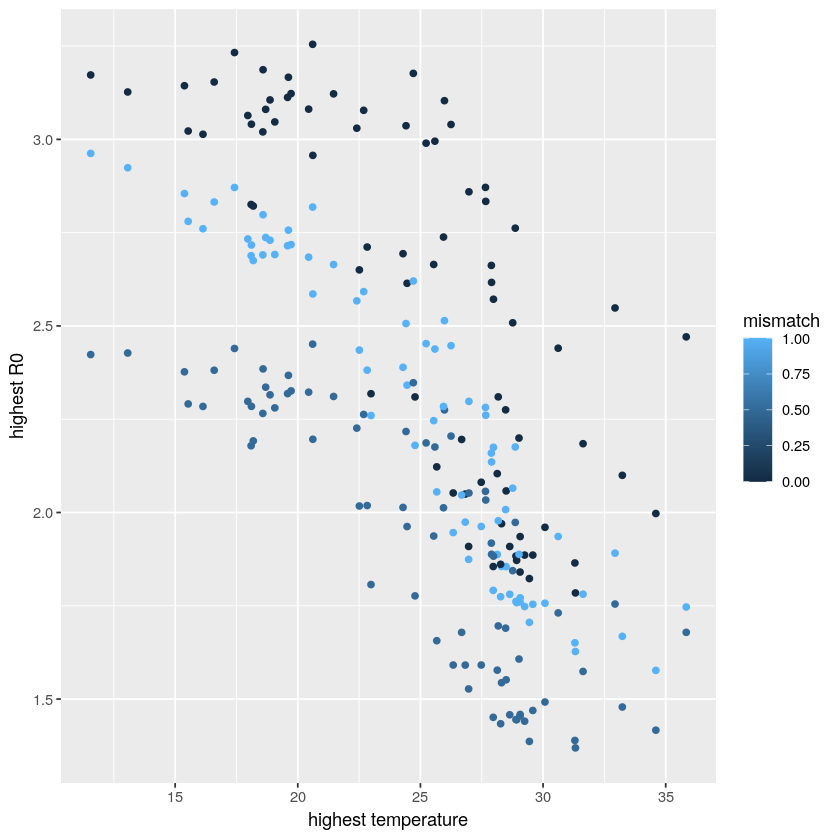

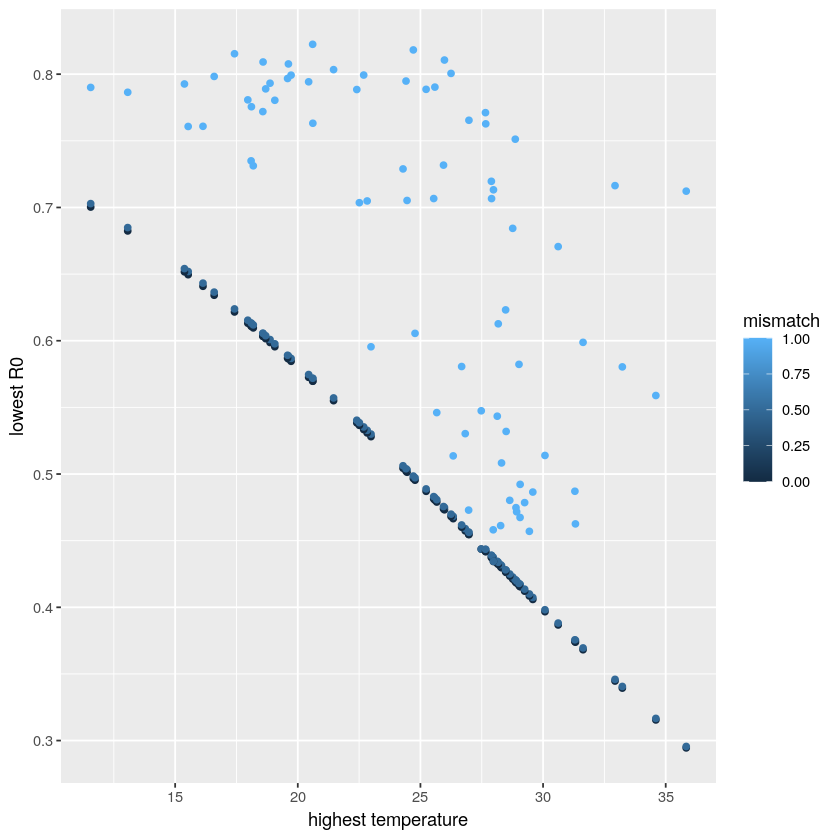

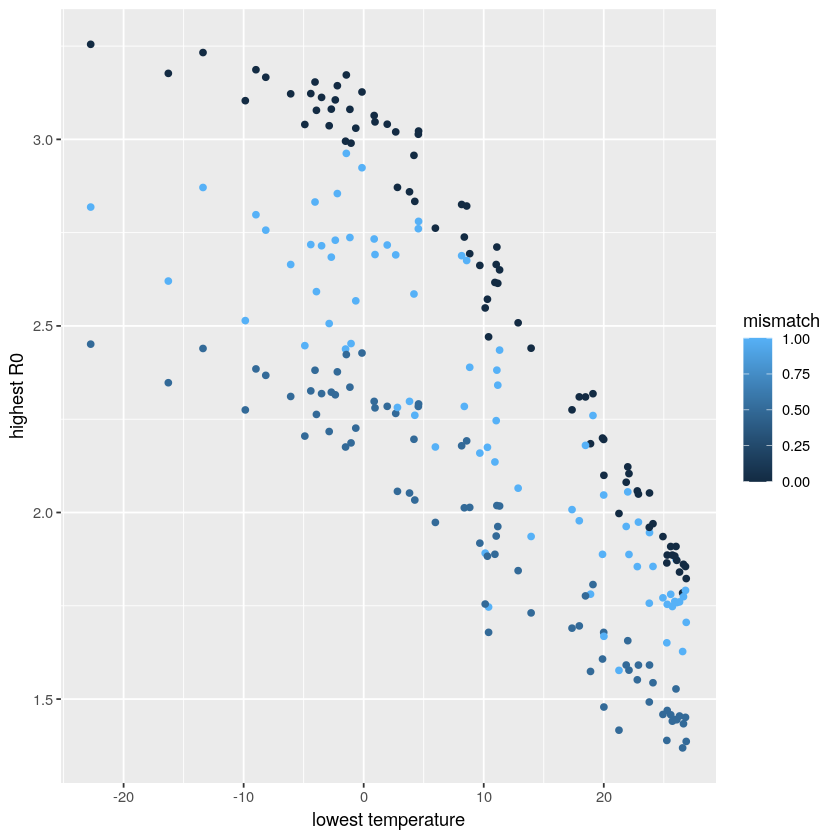

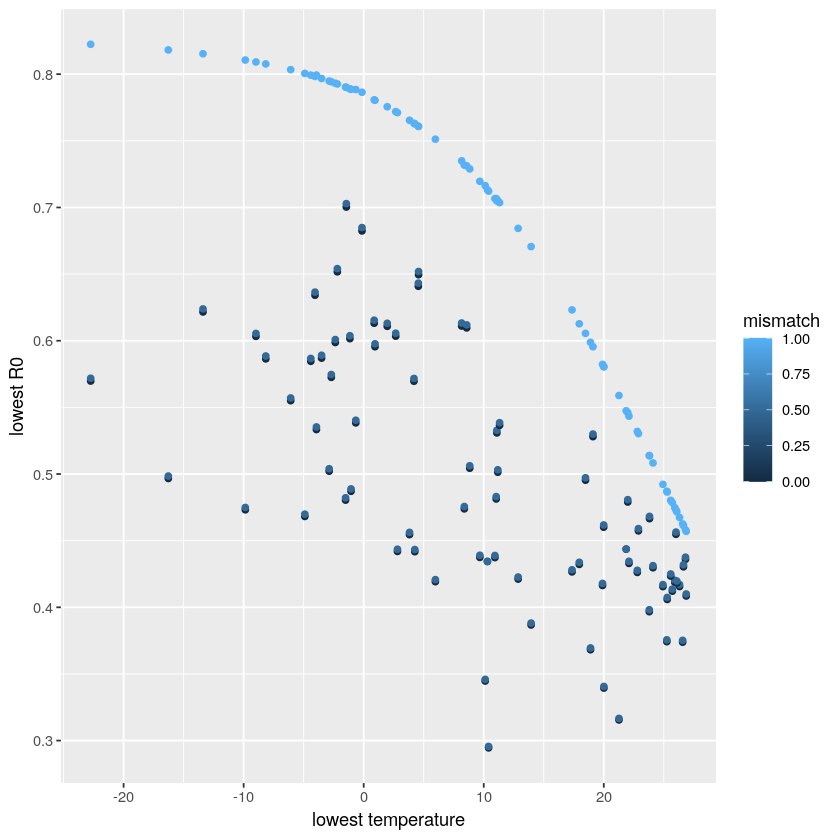

In [8]:

 #summary- models- R0
ggplot(data=model_means_summ, aes(troughT,peakR0,col=mismatch))+xlab("week with lowest temperatrue") +ylab("week with highest R0")+geom_point()# peak flu time and low temp time related
ggplot(data=model_means_summ, aes(peakT,peakR0,col=mismatch))+xlab("week with highest temperatrue") +ylab("week with highest R0")+geom_point()
ggplot(data=model_means_summ, aes(maxT,maxR0,col=mismatch))+xlab("highest temperature")+ylab("highest R0")+geom_point() #these show importance of mismatch
ggplot(data=model_means_summ, aes(maxT,minR0,col=mismatch))+xlab("highest temperature")+ylab("lowest R0")+geom_point()# but also always decrease when look at R0, above confounded by seir dynamics
ggplot(data=model_means_summ, aes(minT,maxR0,col=mismatch))+xlab("lowest temperature")+ylab("highest R0")+geom_point()
ggplot(data=model_means_summ, aes(minT,minR0,col=mismatch))+xlab("lowest temperature")+ylab("lowest R0")+geom_point()



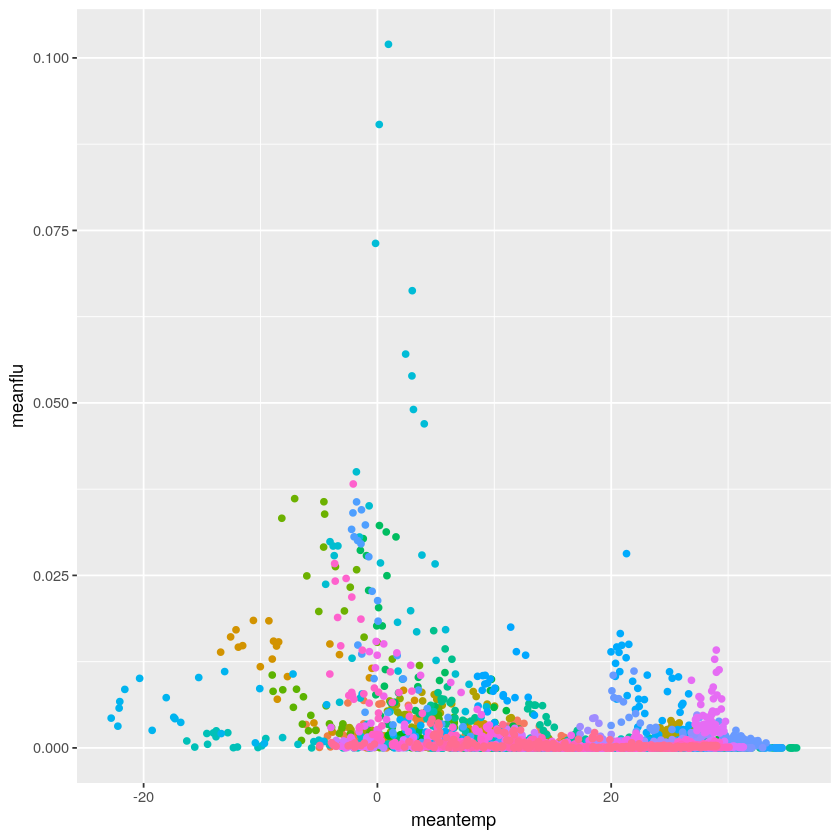

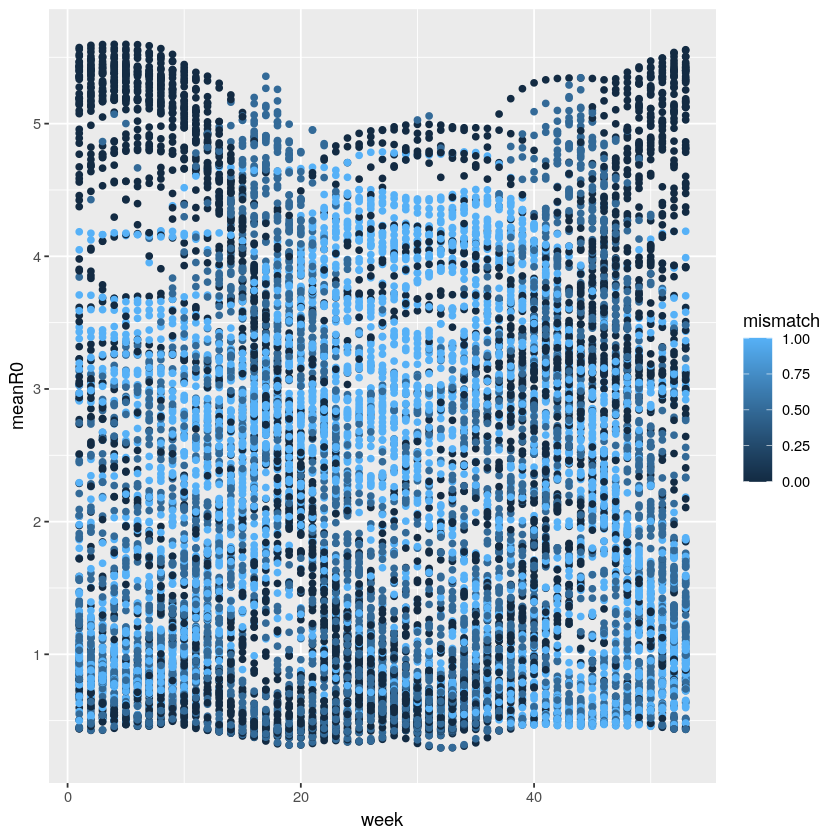

In [9]:

#too complex to be v helpful
ggplot(data=data_wider_means,aes(meantemp,meanflu,color=country))+geom_point()+theme(legend.position ="none")
ggplot(data=model_means,aes(week,meanR0,col=mismatch))+geom_point()

`summarise()` ungrouping output (override with `.groups` argument)



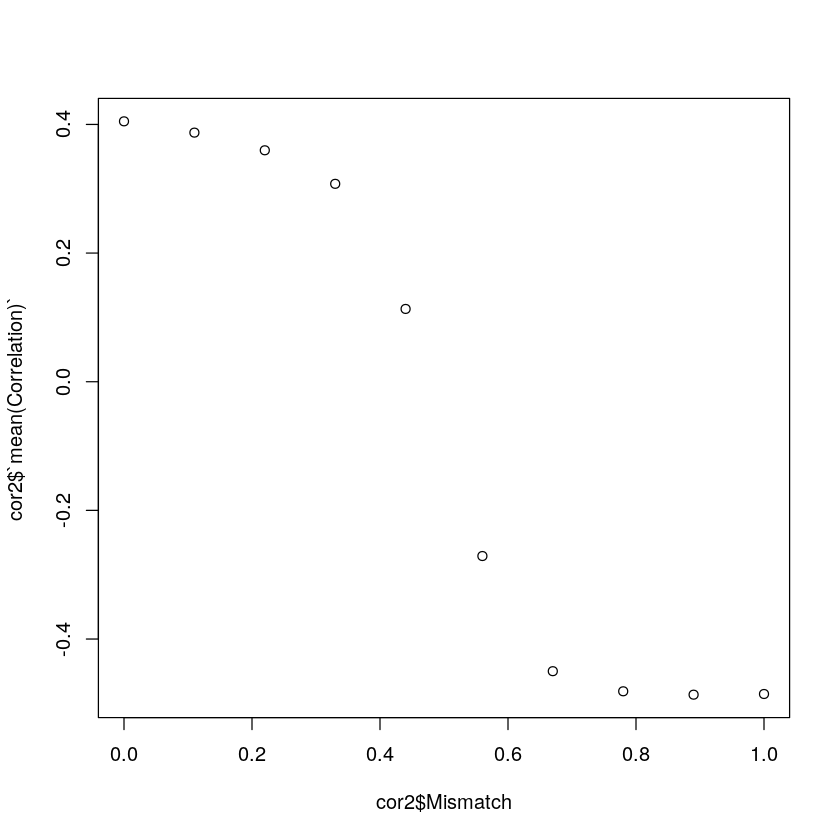

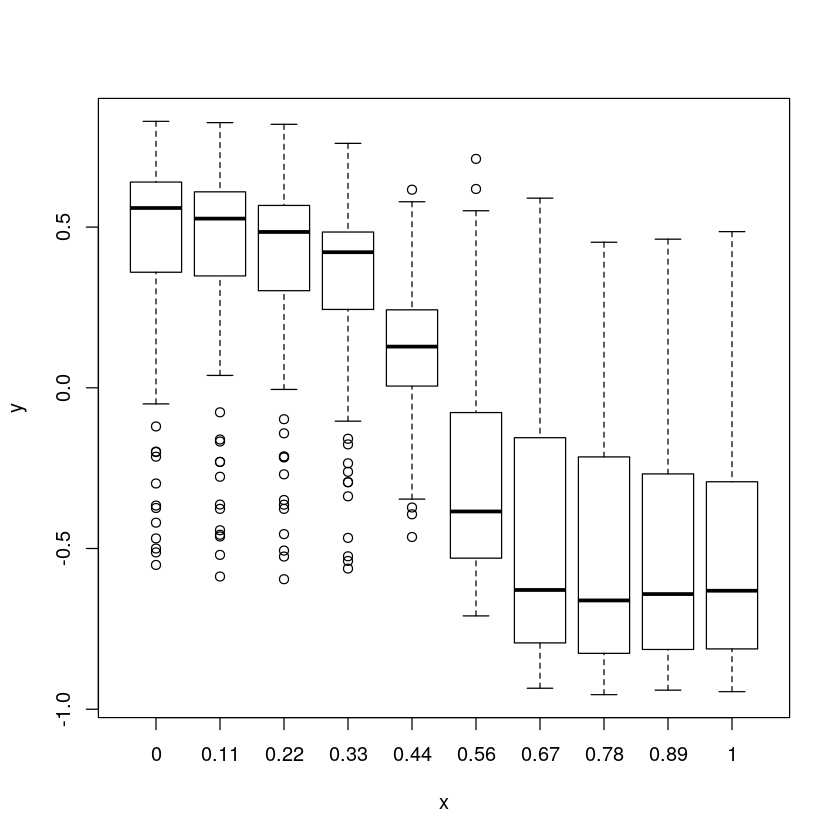

In [8]:
correlation_df<-as.data.frame(matrix(nrow=nrow(model_means_summ),ncol=3))
colnames(correlation_df)=c("Country","Mismatch","Correlation")
correlation_df[,"Country"]<-model_means_summ[,"country"]
correlation_df[,"Mismatch"]<-model_means_summ[,"mismatch"]
for (i in 1:nrow(correlation_df)){
  
  country<-correlation_df[i,"Country"]
  mismatch<-correlation_df[i,"Mismatch"]
  
  data_sub<-data_wider_means[which(data_wider_means$country==country),]
  model_sub<-model_means[which(model_means$country==country),]
  model_sub<-model_sub[which(model_sub$mismatch==mismatch),]
  model_sub<-model_sub[c(1:nrow(data_sub)),]

  correlation_df[i,"Correlation"]<-cor.test(model_sub$meanI,data_sub$meanflu)[4]
  }

cor2<-correlation_df%>% group_by(Mismatch) %>% summarise(mean(Correlation))
plot(cor2$Mismatch,cor2$`mean(Correlation)`)
correlation_df$Mismatch<-as.factor(correlation_df$Mismatch)
plot(correlation_df$Mismatch,correlation_df$Correlation)

#################################################################


# Non summarised data

In [ ]:
model_wide<-read.csv("../../Results/model_results_sinusoidal.csv")

In [ ]:
model_wide$country<-data_wider_means_summ[model_wide$country,"country"]

In [ ]:
ggplot(data=model_wide, aes(temperature,I,col=country))+geom_point()+theme(legend.position="none")

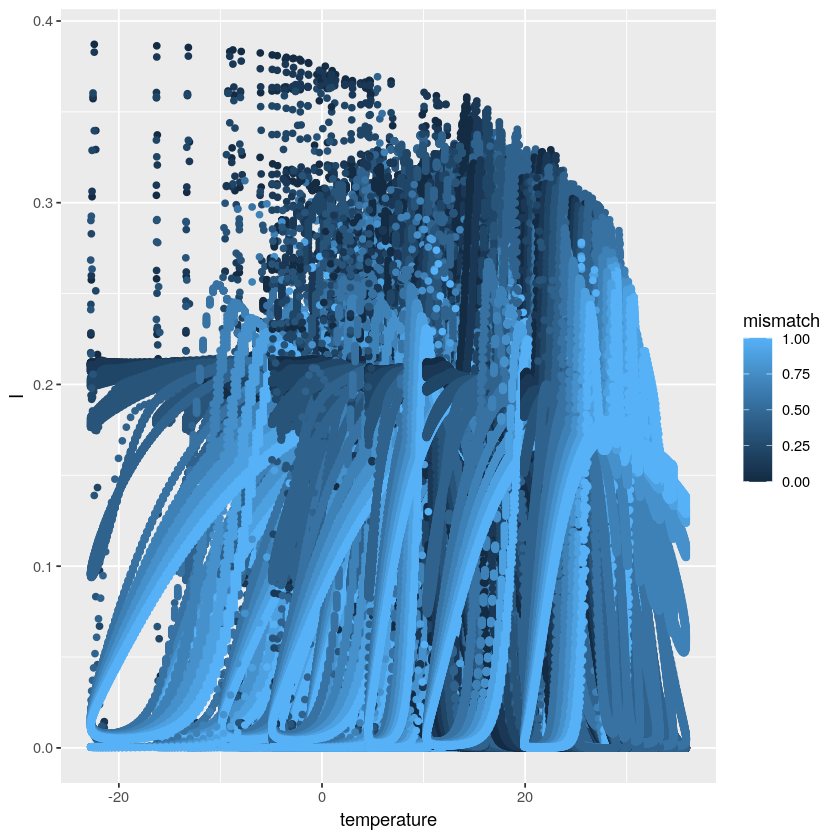

In [6]:
ggplot(data=model_wide, aes(temperature,I,col=mismatch))+geom_point()

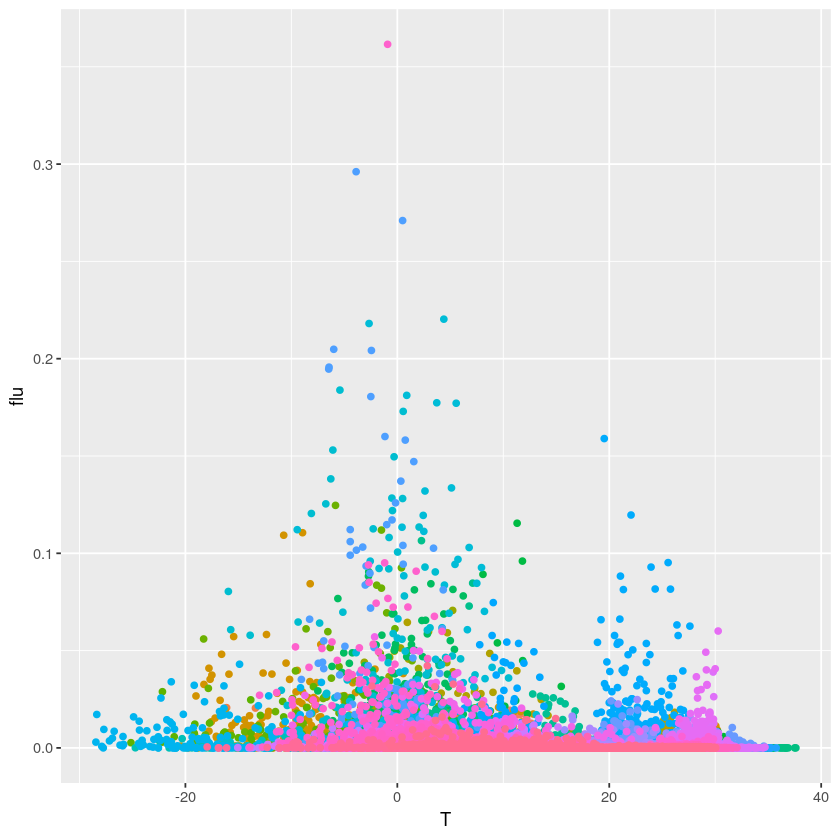

In [7]:
ggplot(data=data_wider,aes(T,flu,col=country))+geom_point()+theme(legend.position="none")